##### Impact of Data Normalization on Stock Index Forecasting

https://www.researchgate.net/publication/291962265_Impact_of_Data_Normalization_on_Stock_Index_Forecasting

In [1]:
import pandas as pd
import numpy as np
from numpy import exp, mean, median, tanh, std
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
def plott(x, y1, y2, title):
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(20)
    ax.plot(x, y1,color = "#1f77b4")

    ax2=ax.twinx()
    ax2.plot(x, y2,color="#ff7f0e", alpha = 0.5)
    plt.title(title)
    plt.show()

In [2]:
data = pd.read_csv("cryptodatadownload/Binance_SOLUSDT_minute.csv", skiprows = 1, usecols = [0, 1, 3, 4, 5, 6], nrows = 2880)[::-1]
data.index = data.index[::-1]
data = data.head(180)

###### High-Low MINMAX
###### y = low + (high - low)*(x - min(x)) / (max(x) - min(x))

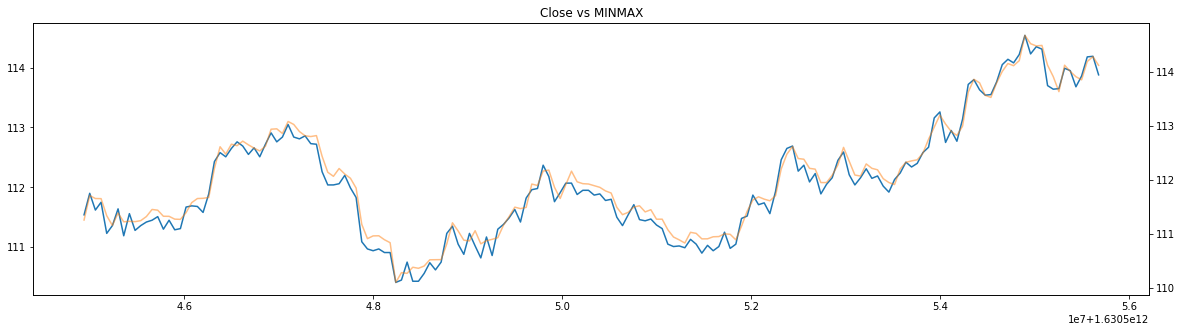

In [3]:
data["MINMAX"] = data.low + ((data.high - data.low)*(data.close - min(data.close)))/(max(data.close) - min(data.close))
plott(data.unix, data.close, data.MINMAX, "Close vs MINMAX")

###### Decimal Scaling Normalization
###### y = x/10^(d)

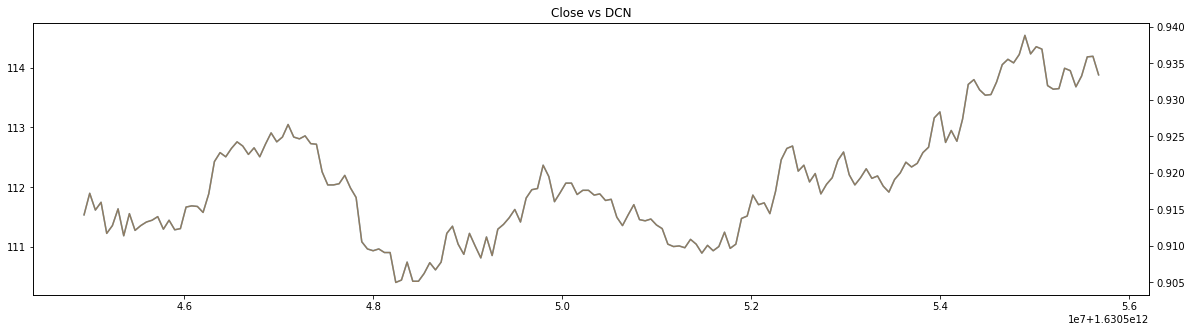

In [4]:
i = 0
d = 0
while max(data.close/(10^i)) >= 1:   
    i+=1
d = i
data["DCN"] = data.close/(10^d)
plott(data.unix, data.close, data.DCN, "Close vs DCN")

###### Median normalization 
###### y = x/median(x)

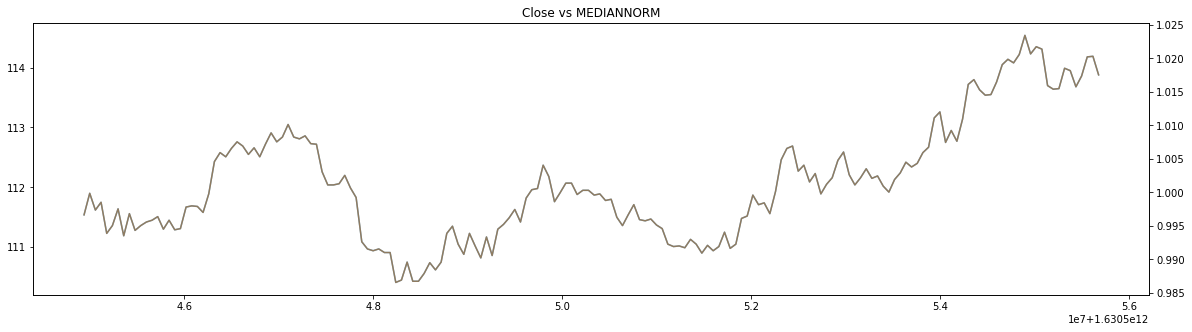

In [5]:
data["MEDIANNORM"] = data.close/median(data.close)
plott(data.unix, data.close, data.MEDIANNORM, "Close vs MEDIANNORM")

###### Sigmoid normalization
###### y = 1 / (1 + exp(x))

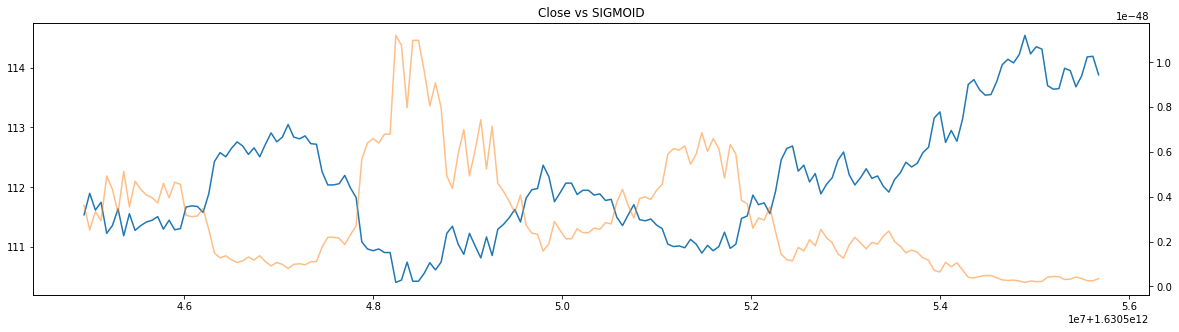

In [6]:
data["SIGMOID"] = 1/(1 + exp(data.close))
plott(data.unix, data.close, data.SIGMOID, "Close vs SIGMOID")

###### Median and Mean Absolute Deviation <br>
###### y = (x - median(x)) / ( median( |x - mean(x)| ))

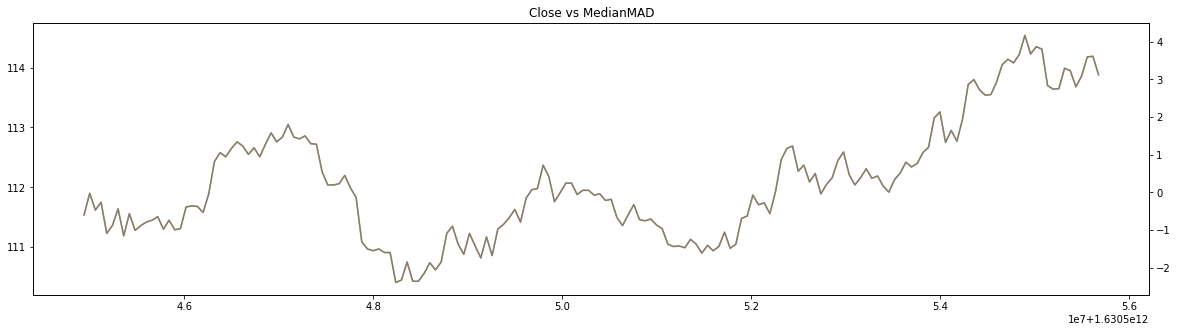

In [7]:
data["MedianMAD"] = (data.close - median(data.close))/(median(abs(data.close - median(data.close))))
plott(data.unix, data.close, data.MedianMAD, "Close vs MedianMAD")

###### Tanh estimators 
###### y = 0.5 * ( tanh(0.01(x - mean(x))/std(x)) ) +1

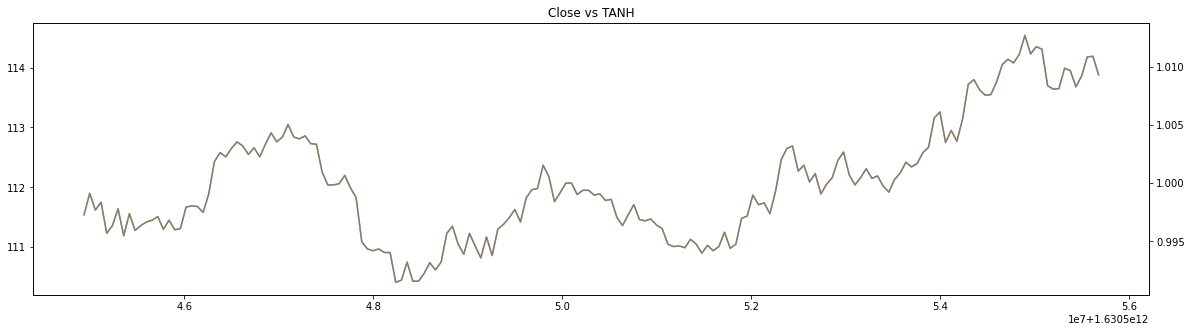

In [8]:
data["TANH"] = 0.5*tanh(0.01*(data.close - mean(data.close))/std(data.close, ddof = 1)) + 1
plott(data.unix, data.close, data.TANH, "Close vs TANH")